In [34]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation,ActivityRegularization
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [35]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation,ActivityRegularization
from keras.layers import Conv2D, MaxPooling2D,Flatten

from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist



#Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Reshaping DataSet so it can be used with CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28,28, 1)
    

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#plotting function
def plotting(history):
  fig = plt.figure()
  history_dict = history.history
  print(history_dict.keys())
  plt.subplot(2,1,1)
  plt.plot(history_dict['accuracy'])
  plt.plot(history_dict['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training Set', 'Validation Set'], loc='lower right')

  plt.subplot(2,1,2)


  plt.plot( history_dict['loss'])
  plt.plot( history_dict['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training Set', 'Validation Set'], loc='upper right')

  plt.tight_layout()

Epoch 1/5
329/329 [==============================] - 34s 104ms/step - loss: 0.6084 - accuracy: 0.8075 - val_loss: 0.1667 - val_accuracy: 0.9512
Epoch 2/5
329/329 [==============================] - 34s 104ms/step - loss: 0.1877 - accuracy: 0.9458 - val_loss: 0.1094 - val_accuracy: 0.9657
Epoch 3/5
329/329 [==============================] - 34s 104ms/step - loss: 0.1374 - accuracy: 0.9596 - val_loss: 0.0869 - val_accuracy: 0.9734
Epoch 4/5
329/329 [==============================] - 34s 104ms/step - loss: 0.1099 - accuracy: 0.9683 - val_loss: 0.0835 - val_accuracy: 0.9745
Epoch 5/5
329/329 [==============================] - 34s 104ms/step - loss: 0.0934 - accuracy: 0.9725 - val_loss: 0.0760 - val_accuracy: 0.9772
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
313/313 [==============================] - 3s 9ms/step - loss: 0.0687 - accuracy: 0.9792

Test accuracy: 97.9%
--- 174.88266611099243 seconds ---


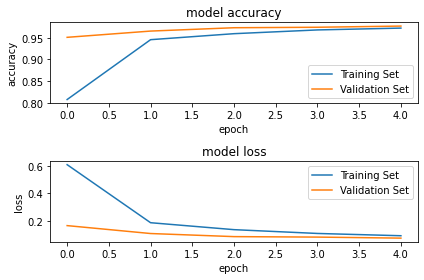

In [36]:
#Normal Network
import time
start_time = time.time()

##model building
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
 
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train,
          batch_size=128, epochs=5,
          validation_split=0.3)

plotting(history)
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("--- %s seconds ---" % (time.time() - start_time))

This is the basic CNN that we build.

In [37]:
#activation functions 
activationFunctions = ["sigmoid","relu","softmax","tanh"]
import time
t = []
l= []
a = []
for activation in activationFunctions:
  print(activation)
  start_time = time.time()
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation=activation,
                 input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation=activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation=activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation))                            
  model.add(Dropout(0.2))
  model.add(Dense(10))
  model.add(Activation("softmax"))

  # compiling the sequential model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  # training the model and saving metrics in history
  history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          validation_split=0.3)

  #plotting(history)
  loss, acc = model.evaluate(X_test, Y_test)
  l.append(loss)
  a.append((100.0 * acc))
  t.append(time.time() - start_time)

print("loss")
print(l)
print("accuracy")
print(a)
print("Time for execution")
print(t)


sigmoid
Epoch 1/5
329/329 [==============================] - 36s 109ms/step - loss: 2.0963 - accuracy: 0.2361 - val_loss: 0.9298 - val_accuracy: 0.7457
Epoch 2/5
329/329 [==============================] - 35s 107ms/step - loss: 0.5129 - accuracy: 0.8516 - val_loss: 0.2979 - val_accuracy: 0.9110
Epoch 3/5
329/329 [==============================] - 35s 108ms/step - loss: 0.2669 - accuracy: 0.9183 - val_loss: 0.2032 - val_accuracy: 0.9381
Epoch 4/5
329/329 [==============================] - 35s 108ms/step - loss: 0.2006 - accuracy: 0.9391 - val_loss: 0.1666 - val_accuracy: 0.9501
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.1380 - accuracy: 0.9560
relu
Epoch 1/5
329/329 [==============================] - 36s 108ms/step - loss: 0.4207 - accuracy: 0.8712 - val_loss: 0.1364 - val_accuracy: 0.9563
Epoch 2/5
329/329 [==============================] - 35s 107ms/step - loss: 0.1178 - accuracy: 0.9645 - val_loss: 0.1022 - val_accuracy: 0.9687
Epoch 3/5
329/329 [====

Here I am using different activation functions.

ActivationFunctions = ["sigmoid","relu","softmax","tanh"]

Relu and tanh are the best activation function for this dataset.

If we use softmax then accuracy is not that much high and network performance is bad.



In [38]:
#dropout 
ddropout = [0.2,0.3,0.5]
import time
t = []
l= []
a = []
for d in ddropout:
 
  start_time = time.time()
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
                            
  model.add(Dropout(d))

  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(Dropout(d))

  model.add(Dense(10))
  model.add(Activation("softmax"))

  # compiling the sequential model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  # training the model and saving metrics in history
  history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          validation_split=0.3)

  #plotting(history)
  loss, acc = model.evaluate(X_test, Y_test)
  l.append(loss)
  a.append((100.0 * acc))
  t.append(time.time() - start_time)

print("loss")
print(l)
print("accuracy")
print(a)
print("Time for execution")
print(t)

Epoch 1/5
329/329 [==============================] - 37s 113ms/step - loss: 0.3922 - accuracy: 0.8742 - val_loss: 0.1278 - val_accuracy: 0.9611
Epoch 2/5
329/329 [==============================] - 37s 112ms/step - loss: 0.1101 - accuracy: 0.9660 - val_loss: 0.0804 - val_accuracy: 0.9748
Epoch 3/5
329/329 [==============================] - 41s 124ms/step - loss: 0.0763 - accuracy: 0.9761 - val_loss: 0.0685 - val_accuracy: 0.9778
Epoch 4/5
329/329 [==============================] - 37s 111ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0749 - val_accuracy: 0.9771
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0548 - accuracy: 0.9830
Epoch 1/5
329/329 [==============================] - 37s 113ms/step - loss: 0.3944 - accuracy: 0.8758 - val_loss: 0.1041 - val_accuracy: 0.9659
Epoch 2/5
329/329 [==============================] - 37s 112ms/step - loss: 0.1049 - accuracy: 0.9675 - val_loss: 0.0768 - val_accuracy: 0.9769
Epoch 3/5
329/329 [=================

Changing dropout has no effect on accuracy and the time for execution is almost same.

In [39]:
#optimizer 
optimizer = ["Adam","SGD","RMSprop","Ftrl"]
import time
t = []
l= []
a = []
for o in optimizer:
 
  start_time = time.time()
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
                             
  model.add(Dropout(0.2))

  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(Dropout(0.2))

  model.add(Dense(10))
  model.add(Activation("softmax"))

  # compiling the sequential model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=o)
  # training the model and saving metrics in history
  history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          validation_split=0.3)

  #plotting(history)
  loss, acc = model.evaluate(X_test, Y_test)
  l.append(loss)
  a.append((100.0 * acc))
  t.append(time.time() - start_time)
print("loss")
print(l)
print("accuracy")
print(a)
print("Time for execution")
print(t)

Epoch 1/5
329/329 [==============================] - 36s 111ms/step - loss: 0.3735 - accuracy: 0.8802 - val_loss: 0.1131 - val_accuracy: 0.9627
Epoch 2/5
329/329 [==============================] - 37s 113ms/step - loss: 0.1048 - accuracy: 0.9681 - val_loss: 0.0979 - val_accuracy: 0.9718
Epoch 3/5
329/329 [==============================] - 37s 113ms/step - loss: 0.0743 - accuracy: 0.9771 - val_loss: 0.0698 - val_accuracy: 0.9786
Epoch 4/5
329/329 [==============================] - 43s 131ms/step - loss: 0.0600 - accuracy: 0.9814 - val_loss: 0.0589 - val_accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0513 - accuracy: 0.9840
Epoch 1/5
329/329 [==============================] - 37s 113ms/step - loss: 2.2841 - accuracy: 0.2461 - val_loss: 2.2570 - val_accuracy: 0.4578
Epoch 2/5
329/329 [==============================] - 37s 112ms/step - loss: 2.1433 - accuracy: 0.3896 - val_loss: 1.7533 - val_accuracy: 0.4834
Epoch 3/5
329/329 [=================

Optimizer has major effect on network performance. If we use Ftrl optimizer we get very low accuracy of about only 11 percent.

Adam and RMSpop is a good optimizer in this case.


In [40]:
#batchsize
batchsize = [128,250,500]
import time
t = []
l= []
a = []
for b in batchsize:
 
  start_time = time.time()
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
                            
  model.add(Dropout(0.2))

  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(Dropout(0.2))

  model.add(Dense(10))
  model.add(Activation("softmax"))

  # compiling the sequential model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
  # training the model and saving metrics in history
  history = model.fit(X_train, Y_train,
          batch_size=b, epochs=5,
          validation_split=0.3)

  #plotting(history)
  loss, acc = model.evaluate(X_test, Y_test)
  l.append(loss)
  a.append((100.0 * acc))
  t.append(time.time() - start_time)

print("loss")
print(l)
print("accuracy")
print(a)
print("Time for execution")
print(t)

Epoch 1/5
329/329 [==============================] - 37s 114ms/step - loss: 0.3881 - accuracy: 0.8727 - val_loss: 0.1423 - val_accuracy: 0.9577
Epoch 2/5
329/329 [==============================] - 37s 113ms/step - loss: 0.1049 - accuracy: 0.9678 - val_loss: 0.0762 - val_accuracy: 0.9757
Epoch 3/5
329/329 [==============================] - 37s 113ms/step - loss: 0.0723 - accuracy: 0.9770 - val_loss: 0.0722 - val_accuracy: 0.9769
Epoch 4/5
329/329 [==============================] - 37s 113ms/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.0801 - val_accuracy: 0.9751
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0759 - accuracy: 0.9773
Epoch 1/5
168/168 [==============================] - 34s 200ms/step - loss: 0.5091 - accuracy: 0.8421 - val_loss: 0.1507 - val_accuracy: 0.9529
Epoch 2/5
168/168 [==============================] - 33s 199ms/step - loss: 0.1255 - accuracy: 0.9615 - val_loss: 0.0921 - val_accuracy: 0.9712
Epoch 3/5
168/168 [=================

Changing batch size has major effect on execution time of our network. For batch size 500 time is less as compared to normal execution.

In [41]:
#weights initiation methods
from tensorflow.keras import layers
from tensorflow.keras import initializers
import tensorflow as tf
 
initiationmethods = [tf.keras.initializers.Ones(),tf.keras.initializers.Zeros(),tf.keras.initializers.RandomNormal(mean=0., stddev=1.)]
import time
t = []
l= []
a = []
for ii in initiationmethods:
  start_time = time.time()
  model = Sequential()
  model.add(Conv2D(32, kernel_initializer=ii,kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), kernel_initializer=ii,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), kernel_initializer=ii,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512,kernel_initializer=ii))
  model.add(Activation("relu"))                            
  model.add(Dropout(0.2))

  model.add(Dense(512,kernel_initializer=ii))
  model.add(Activation("relu"))
  model.add(Dropout(0.2))

  model.add(Dense(10,kernel_initializer=ii))
  model.add(Activation("softmax"))

  # compiling the sequential model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
  # training the model and saving metrics in history
  history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          validation_split=0.3)

  #plotting(history)
  loss, acc = model.evaluate(X_test, Y_test)
  l.append(loss)
  a.append((100.0 * acc))
  t.append(time.time() - start_time)

print("loss")
print(l)
print("accuracy")
print(a)
print("Time for execution")
print(t)

Epoch 1/5
329/329 [==============================] - 36s 110ms/step - loss: 5197860864.0000 - accuracy: 0.1001 - val_loss: 1902036736.0000 - val_accuracy: 0.1075
Epoch 2/5
329/329 [==============================] - 40s 122ms/step - loss: 1326959232.0000 - accuracy: 0.1019 - val_loss: 1327782272.0000 - val_accuracy: 0.0968
Epoch 3/5
329/329 [==============================] - 36s 111ms/step - loss: 635954688.0000 - accuracy: 0.0993 - val_loss: 809140608.0000 - val_accuracy: 0.0968
Epoch 4/5
329/329 [==============================] - 36s 110ms/step - loss: 369761344.0000 - accuracy: 0.0993 - val_loss: 303135040.0000 - val_accuracy: 0.1079
Epoch 5/5
 58/329 [====>.........................] - ETA: 26s - loss: 294627424.0000 - accuracy: 0.0954

KeyboardInterrupt: ignored

This point is very important. If we are using same weights for network then it will not converge properly. For 0's and 1's it gives accuracy of about 11 and 10 percent respectively.

In [42]:
import time

#regularization types
#l1 and l2 regularization
#l2
l2 = [0.2,0.3,0.5]
import time
t = []
l= []
a = []
for ll in l2:
  start_time = time.time()
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
  model.add(ActivityRegularization(0,ll))

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(ActivityRegularization(0,ll))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(ActivityRegularization(0,ll))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))                            
  model.add(ActivityRegularization(0,ll))

  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(ActivityRegularization(0,ll))

  model.add(Dense(10))
  model.add(Activation("softmax"))

  # compiling the sequential model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
  # training the model and saving metrics in history
  history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          validation_split=0.3)

  #plotting(history)
  loss, acc = model.evaluate(X_test, Y_test)
  l.append(loss)
  a.append((100.0 * acc))
  t.append(time.time() - start_time)

print("loss")
print(l)
print("accuracy")
print(a)
print("Time for execution")
print(t)

Epoch 1/5
 36/329 [==>...........................] - ETA: 31s - loss: 7.6777 - accuracy: 0.1491

KeyboardInterrupt: ignored

Epoch 1/5
329/329 [==============================] - 17s 51ms/step - loss: 0.4336 - accuracy: 0.8791 - val_loss: 0.2363 - val_accuracy: 0.9327
Epoch 2/5
329/329 [==============================] - 16s 50ms/step - loss: 0.1809 - accuracy: 0.9478 - val_loss: 0.1473 - val_accuracy: 0.9585
Epoch 3/5
329/329 [==============================] - 17s 50ms/step - loss: 0.1175 - accuracy: 0.9679 - val_loss: 0.1179 - val_accuracy: 0.9668
Epoch 4/5
329/329 [==============================] - 17s 50ms/step - loss: 0.0908 - accuracy: 0.9754 - val_loss: 0.0987 - val_accuracy: 0.9731
Epoch 5/5
329/329 [==============================] - 17s 50ms/step - loss: 0.0757 - accuracy: 0.9791 - val_loss: 0.0870 - val_accuracy: 0.9743
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
313/313 [==============================] - 2s 6ms/step - loss: 0.0740 - accuracy: 0.9755

Test accuracy: 97.5%
--- 85.50521516799927 seconds ---


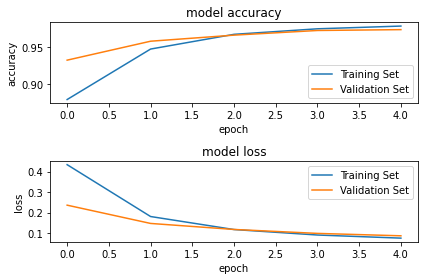

In [43]:
import time
#add or remove hidden layers
#part1
start_time = time.time()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          validation_split=0.3)

plotting(history)
loss, acc = model.evaluate(X_test, Y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("--- %s seconds ---" % (time.time() - start_time))

In this model execution time is very less because I have reduced the number of parameters and using less filters.

At the same time I have good accuray for this model which is compareable to NN.

Epoch 1/5
329/329 [==============================] - 24s 74ms/step - loss: 0.4212 - accuracy: 0.8762 - val_loss: 0.1399 - val_accuracy: 0.9604
Epoch 2/5
329/329 [==============================] - 24s 74ms/step - loss: 0.1294 - accuracy: 0.9625 - val_loss: 0.0905 - val_accuracy: 0.9728
Epoch 3/5
329/329 [==============================] - 24s 74ms/step - loss: 0.0912 - accuracy: 0.9724 - val_loss: 0.0753 - val_accuracy: 0.9761
Epoch 4/5
329/329 [==============================] - 24s 74ms/step - loss: 0.0725 - accuracy: 0.9775 - val_loss: 0.0722 - val_accuracy: 0.9778
Epoch 5/5
329/329 [==============================] - 24s 74ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 0.0692 - val_accuracy: 0.9786
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
313/313 [==============================] - 2s 7ms/step - loss: 0.0547 - accuracy: 0.9826

Test accuracy: 98.3%
--- 125.63266110420227 seconds ---


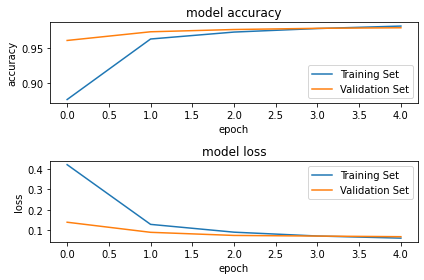

In [44]:
import time
#add or remove hidden layers
#part2
start_time = time.time()
model = Sequential()
model.add(Conv2D(10, kernel_size=(10, 10),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          validation_split=0.3)

plotting(history)
loss, acc = model.evaluate(X_test, Y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("--- %s seconds ---" % (time.time() - start_time))

So as we increase the number of parameters the accuracy of model will increase.